In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
startup = pd.read_csv('/content/50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


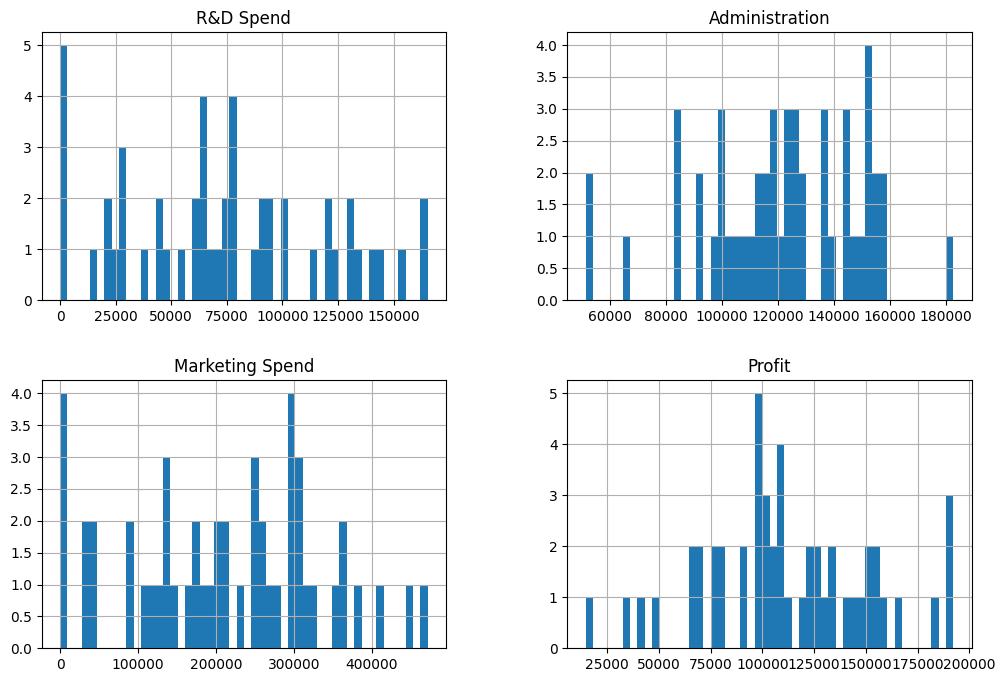

In [4]:
startup.hist(bins=50, figsize=(12,8))
plt.show()

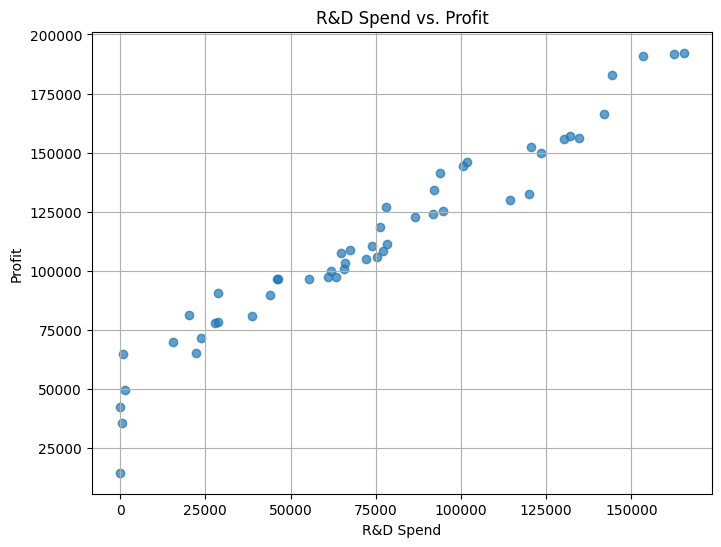

In [5]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(startup['R&D Spend'], startup['Profit'], alpha=0.7)
plt.title('R&D Spend vs. Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

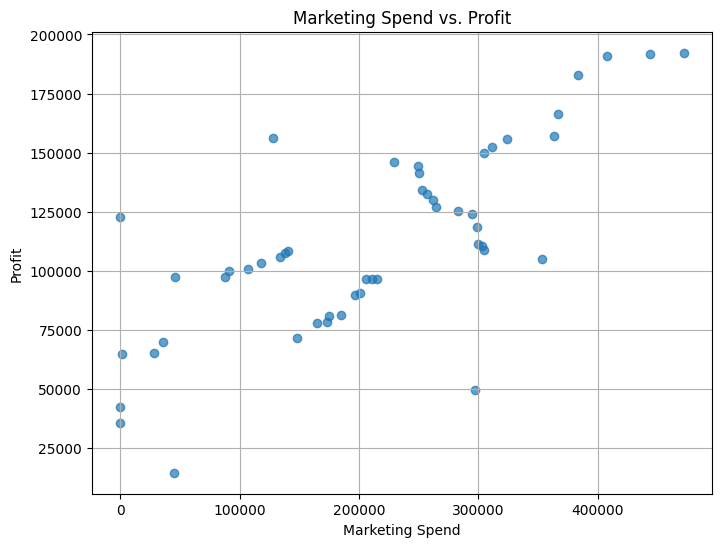

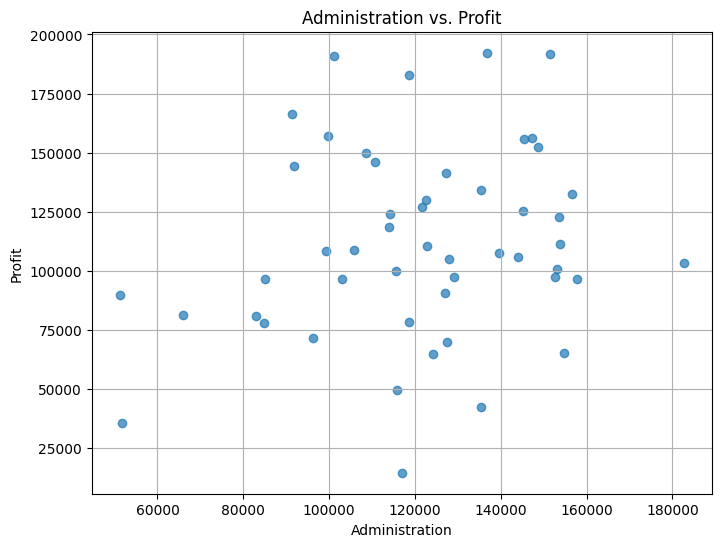

In [6]:
# prompt: generate a scatter plot majorly focusing on profit

plt.figure(figsize=(8, 6))
plt.scatter(startup['Marketing Spend'], startup['Profit'], alpha=0.7)
plt.title('Marketing Spend vs. Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(startup['Administration'], startup['Profit'], alpha=0.7)
plt.title('Administration vs. Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

In [7]:
startup.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [8]:
startup.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [26]:
X = startup[['R&D Spend','Marketing Spend']]
y = startup['Profit']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [31]:
r2_score( y_test, y_pred)

0.9168381183550246

In [32]:
print(lr.intercept_)

45542.39247751425


In [33]:
#checking the prediction
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([193585.41640782])

In [34]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [35]:
#some bonus points.
#model persistance (saving and loading trained models)
import pickle

In [36]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [37]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [38]:
X[0:5]

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [39]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([193585.41640782, 190335.73814917, 181751.79476841, 173676.70177337,
       171234.00345111])

In [40]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual      Predicted
13  134307.35  127521.386041
39   81005.76   82615.074115
30   99937.59   97683.246234
45   64926.08   46400.656776
17  125370.37  130782.536119


       Actual      Predicted
13  134307.35  127521.386041
39   81005.76   82615.074115
30   99937.59   97683.246234
45   64926.08   46400.656776
17  125370.37  130782.536119


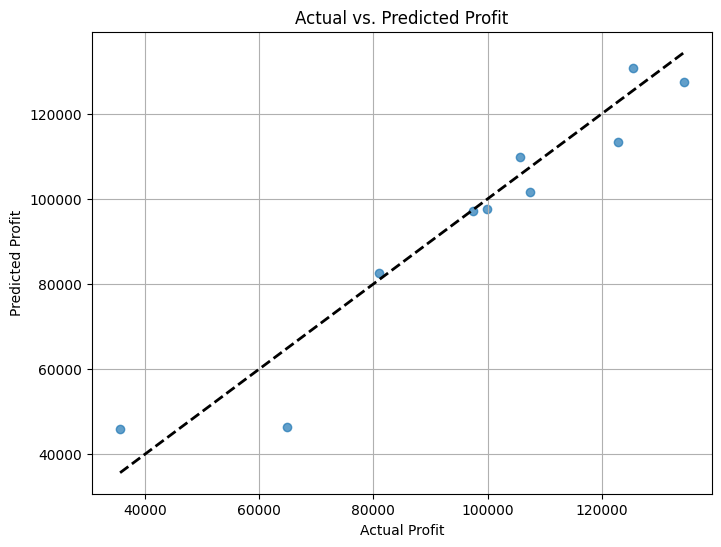

In [43]:

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for reference
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs. Predicted Profit')
plt.grid(True)
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
X = X.values
y = y.values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (40, 2)
Shape of y: (40,)


In [48]:
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X_train, y_train)

y_pred_multiple = model_multiple.predict(X_test)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 67343832.5898
  R² Score: 0.9168


In [49]:
print(model_multiple.intercept_)

45542.39247751422


In [50]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [51]:
model_multiple.predict(X[0:5])

array([193585.41640782, 190335.73814917, 181751.79476841, 173676.70177337,
       171234.00345111])

In [52]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

      Actual      Predicted
0  134307.35  127521.386041
1   81005.76   82615.074115
2   99937.59   97683.246234
3   64926.08   46400.656776
4  125370.37  130782.536119
